In [65]:
!rm -r opencv

In [23]:
import pandas as pd
import numpy as np
import cv2
import os

# List of images
data = []
# List of labels
labels = []
input_path = '/content/dataset'

# Load all directory
for root, dirs, files in os.walk(input_path):
    # Filter every folder
    for dir in dirs:
        print(" Class : \t \t " + dir)
        # Filter all files in the directory
        for filename in os.listdir(input_path + "/" + dir):
            # Make sure that our file is text
            if filename.endswith('.jpg'):
                img = cv2.imread(input_path + "/" + dir + "/" + filename)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                data.append(gray)
                labels.append(dir)

 Class : 	 	 I
 Class : 	 	 Y
 Class : 	 	 J
 Class : 	 	 N
 Class : 	 	 Q
 Class : 	 	 Z
 Class : 	 	 D
 Class : 	 	 M
 Class : 	 	 G
 Class : 	 	 P
 Class : 	 	 U
 Class : 	 	 2
 Class : 	 	 X
 Class : 	 	 K
 Class : 	 	 R
 Class : 	 	 B
 Class : 	 	 A
 Class : 	 	 S
 Class : 	 	 0
 Class : 	 	 H
 Class : 	 	 V
 Class : 	 	 F
 Class : 	 	 8
 Class : 	 	 7
 Class : 	 	 3
 Class : 	 	 W
 Class : 	 	 C
 Class : 	 	 6
 Class : 	 	 E
 Class : 	 	 T
 Class : 	 	 5
 Class : 	 	 O
 Class : 	 	 L
 Class : 	 	 1
 Class : 	 	 4
 Class : 	 	 9


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from matplotlib import pyplot as plt

# Create dictionary for alphabets and related numbers
alphabets_dic = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
             10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
             20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: '0', 27: '1', 28: '2', 29:'3',
             30: '4', 31: '5', 32: '6', 33: '7', 34: '8', 35: '9'}

alphabets = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
dataset_classes = []

for cls in alphabets:
    dataset_classes.append([cls])

label_list = []
for l in labels:
    label_list.append([l])
# print(label_list.size)
# One hot encoding format for output
ohe = OneHotEncoder(handle_unknown='ignore', categories='auto')
ohe.fit(dataset_classes)
labels_ohe = ohe.transform(label_list).toarray()

data = np.array(data)
labels = np.array(labels)


In [25]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(data, labels_ohe, test_size=0.20, random_state=42)

X_train = X_train.reshape(29260,28,28,1)
X_test = X_test.reshape(7316,28,28,1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29260, 28, 28, 1)
(7316, 28, 28, 1)
(29260, 36)
(7316, 36)


In [27]:

# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(36, activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=15, batch_size=64)

model.save('cnn_classifier.h5')


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)         

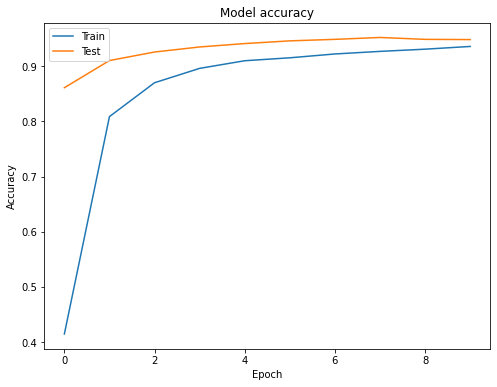

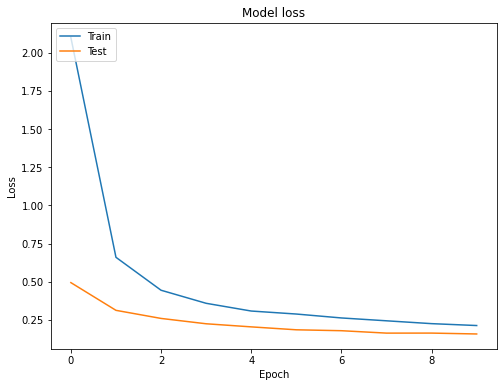

In [15]:

# Visualization
plt.figure(figsize=[8, 6])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.figure(figsize=[8, 6])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [40]:
from google.colab.patches import cv2_imshow

####### This function resize non square image to square one (height == width)
def square(img):
    # image after making height equal to width
    squared_image = img
    # Get image height and width
    h = img.shape[0]
    w = img.shape[1]
    # In case height superior than width
    if h > w:
        diff = h-w
        if diff % 2 == 0:
            x1 = np.ones(shape=(h, diff//2))
            x2 = x1
        else:
            x1 = np.ones(shape=(h, diff//2))
            x2 = np.ones(shape=(h, (diff//2)+1))

        squared_image = np.concatenate((x1, img, x2), axis=1)

    # In case height inferior than width
    if h < w:
        diff = w-h
        if diff % 2 == 0:
            x1 = np.ones(shape=(diff//2, w))
            x2 = x1
        else:
            x1 = np.ones(shape=(diff//2, w))
            x2 = np.ones(shape=((diff//2)+1, w))

        squared_image = np.concatenate((x1, img, x2), axis=0)
    return squared_image

############# for dettecting the number plate from image
def plate_detection(imgpath):
  nPlateCascade = cv2.CascadeClassifier("haarcascade_russian_plate_number.xml")
  minArea = 400
  color = (255,0,255)
  img = cv2.imread(imgpath)
  # cv2_imshow(img)
  imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  numberPlates = nPlateCascade.detectMultiScale(img, 1.1, 4)
  # print(numberPlates)
  for (x, y, w, h) in numberPlates:
    area = w*h
    # print(area)
    if area >minArea:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 2)
      cv2.putText(img,"Number Plate",(x,y-5),
      cv2.FONT_HERSHEY_COMPLEX_SMALL,1,color,2)
      imgRoi = img[y:y+h,x:x+w]
      # cv2_imshow(imgRoi)
              
  cv2_imshow(img)
  return imgRoi


############ extract each character/digits from number plate
def plate_segmentation(plate):
    img=plate
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # cv2_imshow(imgray)

    height = img.shape[0]
    width = img.shape[1]
    area = height * width

    scale1 = 0.01
    scale2 = 0.1
    area_condition1 = area * scale1
    area_condition2 = area * scale2
    # global thresholding
    ret1,th1 = cv2.threshold(imgray,127,255,cv2.THRESH_BINARY)
    # Otsu's thresholding
    ret2,th2 = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # cv2_imshow(th2)
    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(imgray,(5,5),0)
    ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # cv2_imshow(th3)

    contours, hierarchy = cv2.findContours(th3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # sort contours based on x-coordinate
    contours = sorted(contours, key=lambda contours: cv2.boundingRect(contours)[0])

    cropped = []
    for cnt in contours:
        (x,y,w,h) = cv2.boundingRect(cnt)
        ar=w/h
        # cv2_imshow(cnt)
        if (w * h > area_condition1 and w * h < area_condition2 and ar > 0.3 and ar < 3):
            # print("Ar = ",ar)
            c = th2[y:y+h,x:x+w]
            c = np.array(c)
            c = cv2.bitwise_not(c)
            c = square(c)
            c = cv2.resize(c,(28,28), interpolation = cv2.INTER_AREA)
            # cv2_imshow(c)
            cropped.append(c)
            # print('\n')
    # cv2.imwrite('detection.png', img)
    return cropped

In [58]:
from keras.models import Sequential, load_model

def get_result(imgpath):
  # Load model
  model = load_model('cnn_classifier.h5')
  #detect number plate
  plate=plate_detection(imgpath)
  # Detect chars and digits
  digits = plate_segmentation(plate)

  print("\nIdentified Text :  ",end=" ")
  # Predict
  for d in digits:
      d = np.reshape(d, (1,28,28,1))
      out = model.predict(d)
      # Get max pre arg
      p = []
      precision = 0
      for i in range(len(out)):
          z = np.zeros(36)
          z[np.argmax(out[i])] = 1.
          precision = max(out[i])
          p.append(z)
      prediction = np.array(p)

      # Inverse one hot encoding
      alphabets = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
      classes = []
      for a in alphabets:
          classes.append([a])
      ohe = OneHotEncoder(handle_unknown='ignore', categories='auto')
      ohe.fit(classes)
      pred = ohe.inverse_transform(prediction)

      if precision > 0.20:
          print(str(pred[0][0]),end='')

  print("\n\n")


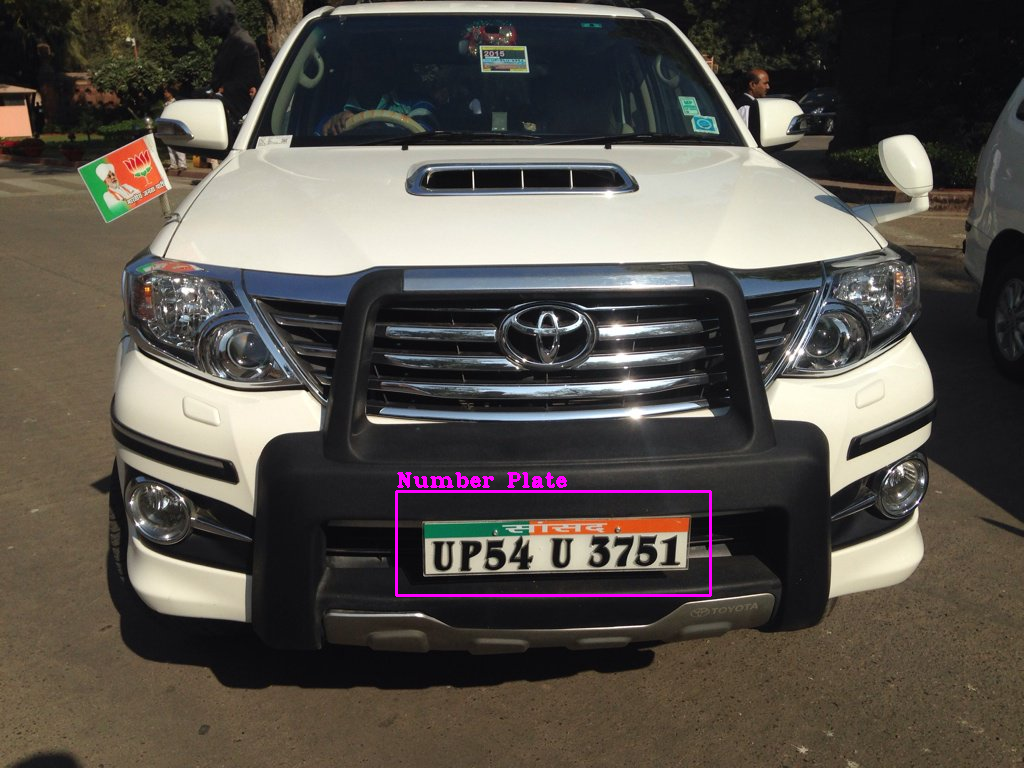


Identified Text :   UP54U3761




In [59]:
get_result('1.png')

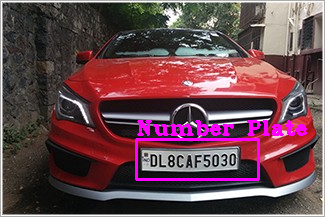


Identified Text :   DL8CAF503U




In [60]:
get_result('2.jpeg')

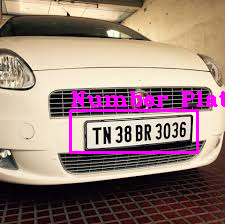


Identified Text :   TN3HBR3D36




In [61]:
get_result('3.jpeg')

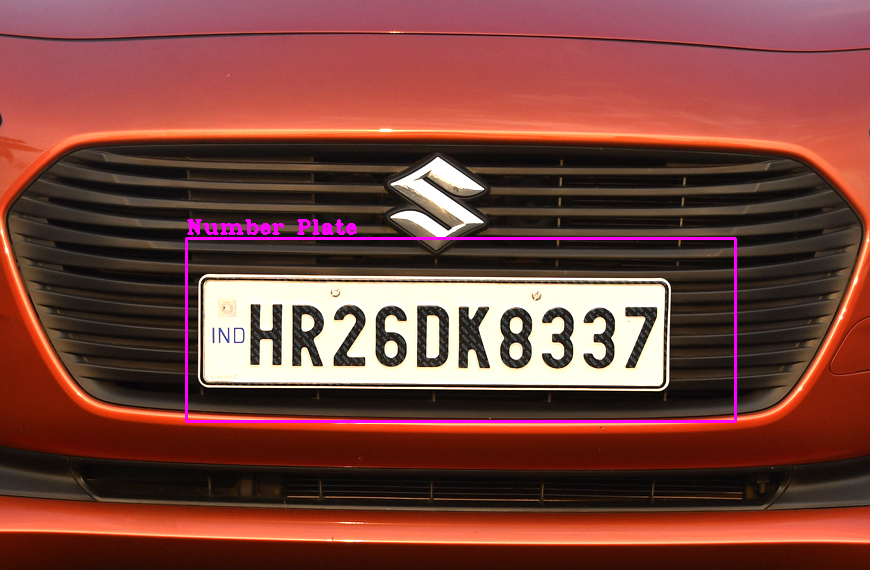


Identified Text :   HRZ6DK8337




In [62]:
get_result('4.jpg')

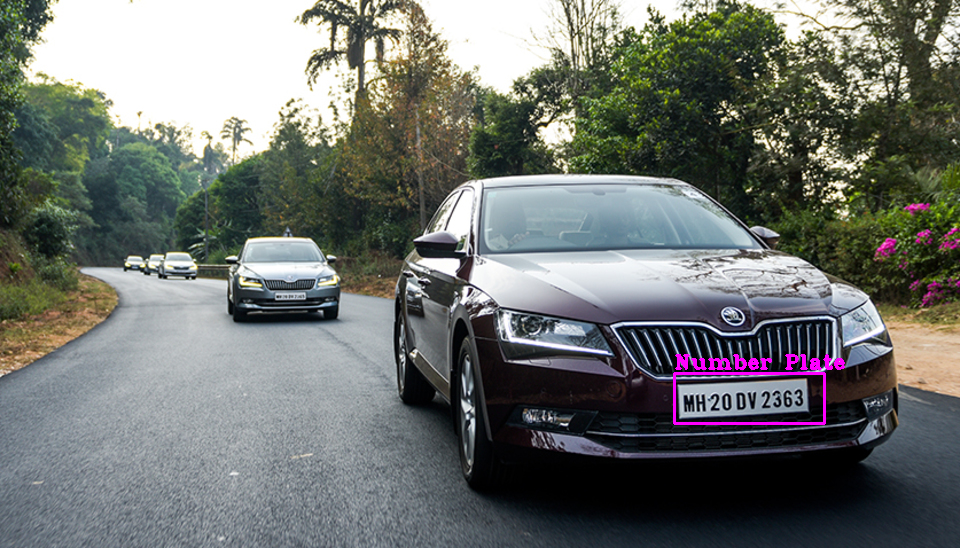


Identified Text :   MH20DY2363




In [63]:
get_result('5.jpg')